Step 1: Load the Dataset

In [2]:
import pandas as pd

# Load the dataset
# Assuming you have already downloaded NSL-KDD dataset
data = pd.read_csv('KDDTrain+.txt', header=None)

# Display the first few rows of the dataset
print(data.head())


   0    1         2   3    4     5   6   7   8   9   ...    33    34    35  \
0   0  tcp  ftp_data  SF  491     0   0   0   0   0  ...  0.17  0.03  0.17   
1   0  udp     other  SF  146     0   0   0   0   0  ...  0.00  0.60  0.88   
2   0  tcp   private  S0    0     0   0   0   0   0  ...  0.10  0.05  0.00   
3   0  tcp      http  SF  232  8153   0   0   0   0  ...  1.00  0.00  0.03   
4   0  tcp      http  SF  199   420   0   0   0   0  ...  1.00  0.00  0.00   

     36    37    38    39    40       41  42  
0  0.00  0.00  0.00  0.05  0.00   normal  20  
1  0.00  0.00  0.00  0.00  0.00   normal  15  
2  0.00  1.00  1.00  0.00  0.00  neptune  19  
3  0.04  0.03  0.01  0.00  0.01   normal  21  
4  0.00  0.00  0.00  0.00  0.00   normal  21  

[5 rows x 43 columns]


Step 2: Feature Engineering

In [4]:
# Check the number of columns in the dataset
print(data.shape)  # This will give you (rows, columns)


(125973, 43)


In [11]:
# Drop the extra column (column 42)
data = data.drop(columns=[42])

# Now, set the correct column names
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
           'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
           'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
           'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
           'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
           'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']

# Assign columns to the dataset
data.columns = columns


KeyError: '[42] not found in axis'

In [12]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['protocol_type', 'service', 'flag'])


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the feature columns (excluding the 'label' column)
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop('label', axis=1)), columns=data.columns[:-1])

# Add the 'label' column back after scaling
data_scaled['label'] = data['label']


In [15]:
# Convert 'label' to binary (normal=0, attack=1)
data_scaled['label'] = data_scaled['label'].apply(lambda x: 0 if x == 'normal' else 1)


In [16]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = data_scaled.drop('label', axis=1)
y = data_scaled['label']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential()

# Input layer (number of neurons = number of features)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           7,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,433 (40.75 KB)

 Trainable params: 10,433 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9689 - loss: 0.0947 - val_accuracy: 0.9856 - val_loss: 0.0400
Epoch 2/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9895 - loss: 0.0290 - val_accuracy: 0.9904 - val_loss: 0.0293
Epoch 3/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9922 - loss: 0.0210 - val_accuracy: 0.9928 - val_loss: 0.0231
Epoch 4/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9941 - loss: 0.0163 - val_accuracy: 0.9911 - val_loss: 0.0267
Epoch 5/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9944 - loss: 0.0150 - val_accuracy: 0.9936 - val_loss: 0.0203
Epoch 6/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9949 - loss: 0.0138 - val_accuracy: 0.9937 - val_loss: 0.0201
Epoch 7/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9952 - loss: 0.0126 - val_accuracy: 0.9950 - val_loss: 0.0185
Epoch 8/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9959 - loss: 0.01

In [19]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9953 - loss: 0.0217
Test Accuracy: 99.51%


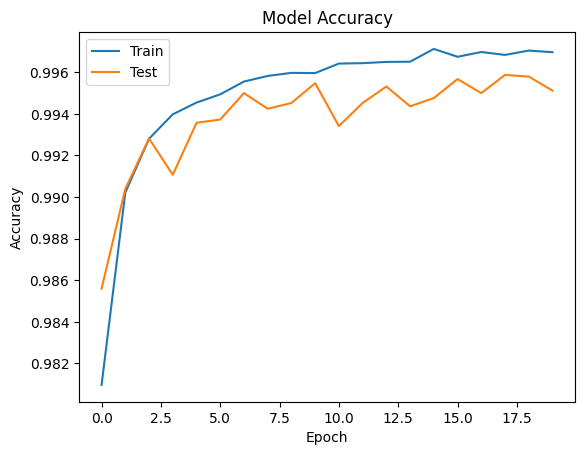

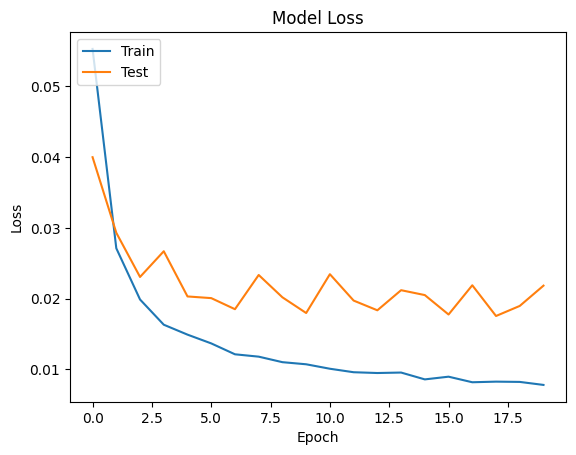

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
